# Analysing Wikidata Triplets extracted seeking slots not present in TACRED

In [1]:
import pandas as pd
import seaborn as sns

## Loading datasets

In [2]:
wikidata_triplets_df = pd.read_csv("../data/wikidata_triplets.csv")
wikidata_triplets_no_tacred_df = pd.read_csv("../data/wikidata_triplets_NO_TACRED.csv")

In [3]:
wikidata_triplets_df.head()

,q_id,q_name,p_id,p_name,p_value,p_value_type
0,Q31,Belgium,P571,inception,"October 04, 1830",time
1,Q31,Belgium,P856,official_website,https://www.belgium.be/,url
2,Q31,Belgium,P463,member_of,European Union,wikibase-item
3,Q23,George Washington,P509,cause_of_death,epiglottitis,wikibase-item
4,Q23,George Washington,P20,place_of_death,Mount Vernon,wikibase-item


In [4]:
wikidata_triplets_no_tacred_df.head()

,q_id,q_name,p_id,p_name,p_value,p_value_type
0,Q31,Belgium,P1344,participant in,Battle of the Lys,wikibase-item
1,Q31,Belgium,P1082,population,11150516.0,quantity
2,Q31,Belgium,P1151,topic's main Wikimedia portal,Portal:Belgium,wikibase-item
3,Q31,Belgium,P1546,motto,Unity makes strength,wikibase-item
4,Q31,Belgium,P5125,Wikimedia outline,outline of Belgium,wikibase-item


## Analysis of NO TACRED

In [5]:
# Number of unique p_names in the dataset
print(
    f"Number of unique p_names in the dataset: {wikidata_triplets_no_tacred_df.p_name.nunique()}"
)

Number of unique p_names in the dataset: 547


Text(0, 0.5, 'p_name')

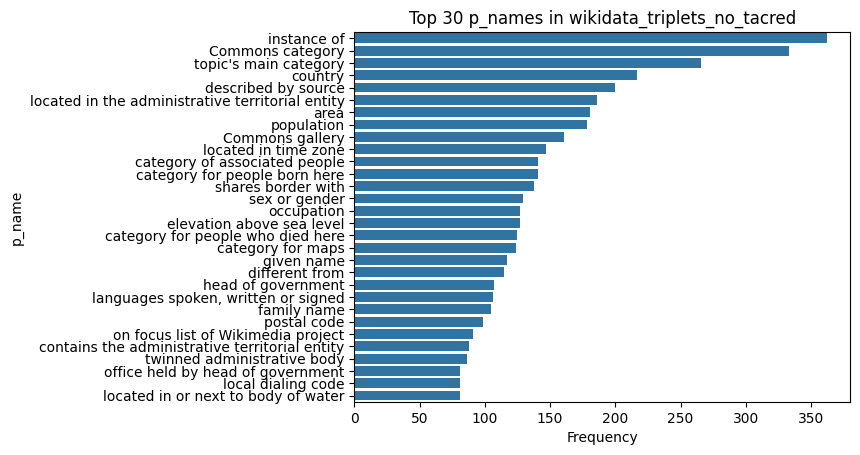

In [6]:
# Plot p_names in wikidata_triplets_no_tacred in a bar plot, ordered by frequency, for the 50 most frequent p_names
p_name_counts = wikidata_triplets_no_tacred_df.p_name.value_counts()
p_name_counts = p_name_counts[:30]

ax = sns.countplot(
    y="p_name", data=wikidata_triplets_no_tacred_df, order=p_name_counts.index
)

ax.set_title("Top 30 p_names in wikidata_triplets_no_tacred")
ax.set_xlabel("Frequency")
ax.set_ylabel("p_name")

[]

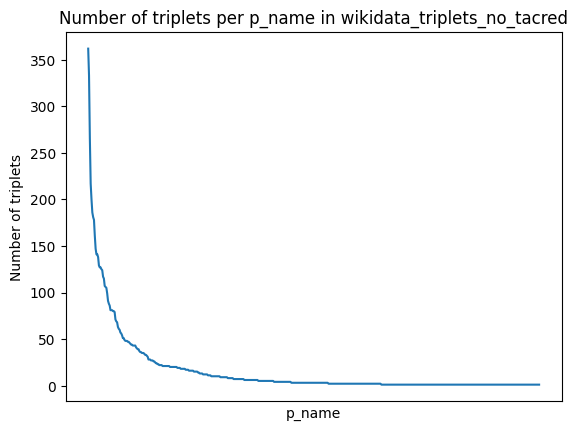

In [7]:
# Line plot with the number of triplets per p_name
p_name_counts = wikidata_triplets_no_tacred_df.p_name.value_counts()

ax = sns.lineplot(x=p_name_counts.index, y=p_name_counts.values)

ax.set_title("Number of triplets per p_name in wikidata_triplets_no_tacred")
ax.set_xlabel("p_name")
ax.set_ylabel("Number of triplets")

# Dont show the names of the p_names in the x-axis legend
ax.set_xticklabels([])
ax.set_xticks([])

Text(0, 0.5, 'p_value_type')

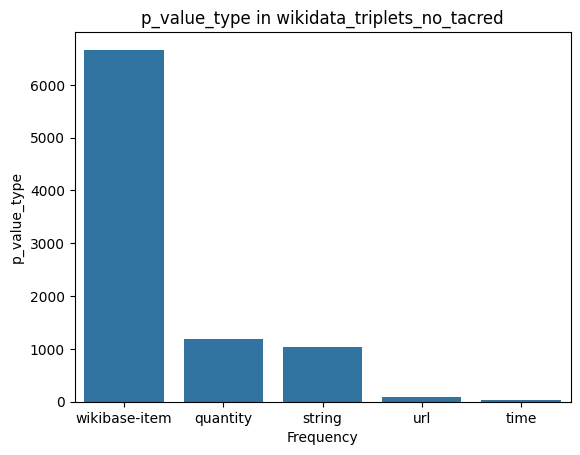

In [8]:
# Countplot of p_value_type
ax = sns.countplot(x="p_value_type", data=wikidata_triplets_no_tacred_df)

ax.set_title("p_value_type in wikidata_triplets_no_tacred")
ax.set_xlabel("Frequency")
ax.set_ylabel("p_value_type")